In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [34]:
data = pd.read_csv('SOCR-HeightWeight.csv')
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [35]:
# df = data.iloc[:,[2,4]]
# data['year'] = pd.DatetimeIndex(df['Date']).year
# data['Year'] = pd.DatetimeIndex(data['Date']).year  
# data

In [36]:
data.shape

(25000, 3)

In [49]:
rnd = data.loc[1:1000,['Height(Inches)','Weight(Pounds)']].round()
rnd

,Height(Inches),Weight(Pounds)
1,72.0,136.0
2,69.0,153.0
3,68.0,142.0
4,68.0,144.0
5,69.0,123.0
...,...,...
996,72.0,133.0
997,71.0,126.0
998,65.0,141.0
999,68.0,136.0


In [51]:
df = rnd.groupby(['Height(Inches)'],as_index=False)['Weight(Pounds)'].mean().round(2)
df

,Height(Inches),Weight(Pounds)
0,62.0,109.00
1,63.0,103.75
2,64.0,117.50
3,65.0,118.33
4,66.0,121.46
5,67.0,124.69
6,68.0,126.46
7,69.0,130.69
8,70.0,134.02
9,71.0,136.11


In [52]:
df.shape

(13, 2)

In [53]:
df.describe()

,Height(Inches),Weight(Pounds)
count,13.00000,13.000000
mean,68.00000,126.580000
std,3.89444,12.368382
min,62.00000,103.750000
25%,65.00000,118.330000
50%,68.00000,126.460000
75%,71.00000,136.110000
max,74.00000,145.000000


In [54]:
df.tail

<bound method NDFrame.tail of     Height(Inches)  Weight(Pounds)
0             62.0          109.00
1             63.0          103.75
2             64.0          117.50
3             65.0          118.33
4             66.0          121.46
5             67.0          124.69
6             68.0          126.46
7             69.0          130.69
8             70.0          134.02
9             71.0          136.11
10            72.0          139.96
11            73.0          138.57
12            74.0          145.00>

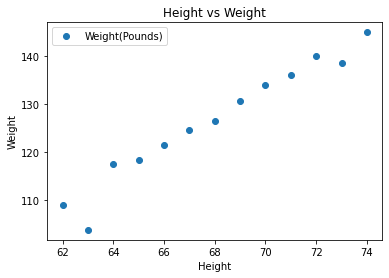

In [55]:
df.plot(x='Height(Inches)', y = 'Weight(Pounds)', style = 'o')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [56]:
# Independent Variable
X = df.iloc[:,:-1].values
y = df.iloc[:, 1].values
y

array([109.  , 103.75, 117.5 , 118.33, 121.46, 124.69, 126.46, 130.69,
       134.02, 136.11, 139.96, 138.57, 145.  ])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [58]:
X_test

array([[66.],
       [62.],
       [72.]])

In [59]:
y_train

array([124.69, 118.33, 103.75, 136.11, 130.69, 138.57, 117.5 , 126.46,
       145.  , 134.02])

In [60]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [61]:
print(reg.intercept_)

-87.71266881028949


In [62]:
print(reg.coef_)

[3.14655949]


In [63]:
y_pred = reg.predict(X_test)

In [64]:
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

In [65]:
df

,Actual,Predicted
0,121.46,119.960257
1,109.00,107.374019
2,139.96,138.839614
